In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
data = pd.read_csv('London.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Property Name      3480 non-null   object
 1   Price              3480 non-null   int64 
 2   House Type         3480 non-null   object
 3   Area in sq ft      3480 non-null   int64 
 4   No. of Bedrooms    3480 non-null   int64 
 5   No. of Bathrooms   3480 non-null   int64 
 6   No. of Receptions  3480 non-null   int64 
 7   Location           2518 non-null   object
 8   City/County        3480 non-null   object
 9   Postal Code        3480 non-null   object
dtypes: int64(5), object(5)
memory usage: 272.0+ KB


In [158]:
from sklearn.model_selection import train_test_split

x = data.drop(['Price'], axis=1)
y = data['Price']


array([[<Axes: title={'center': 'Area in sq ft'}>,
        <Axes: title={'center': 'No. of Bedrooms'}>],
       [<Axes: title={'center': 'No. of Bathrooms'}>,
        <Axes: title={'center': 'No. of Receptions'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

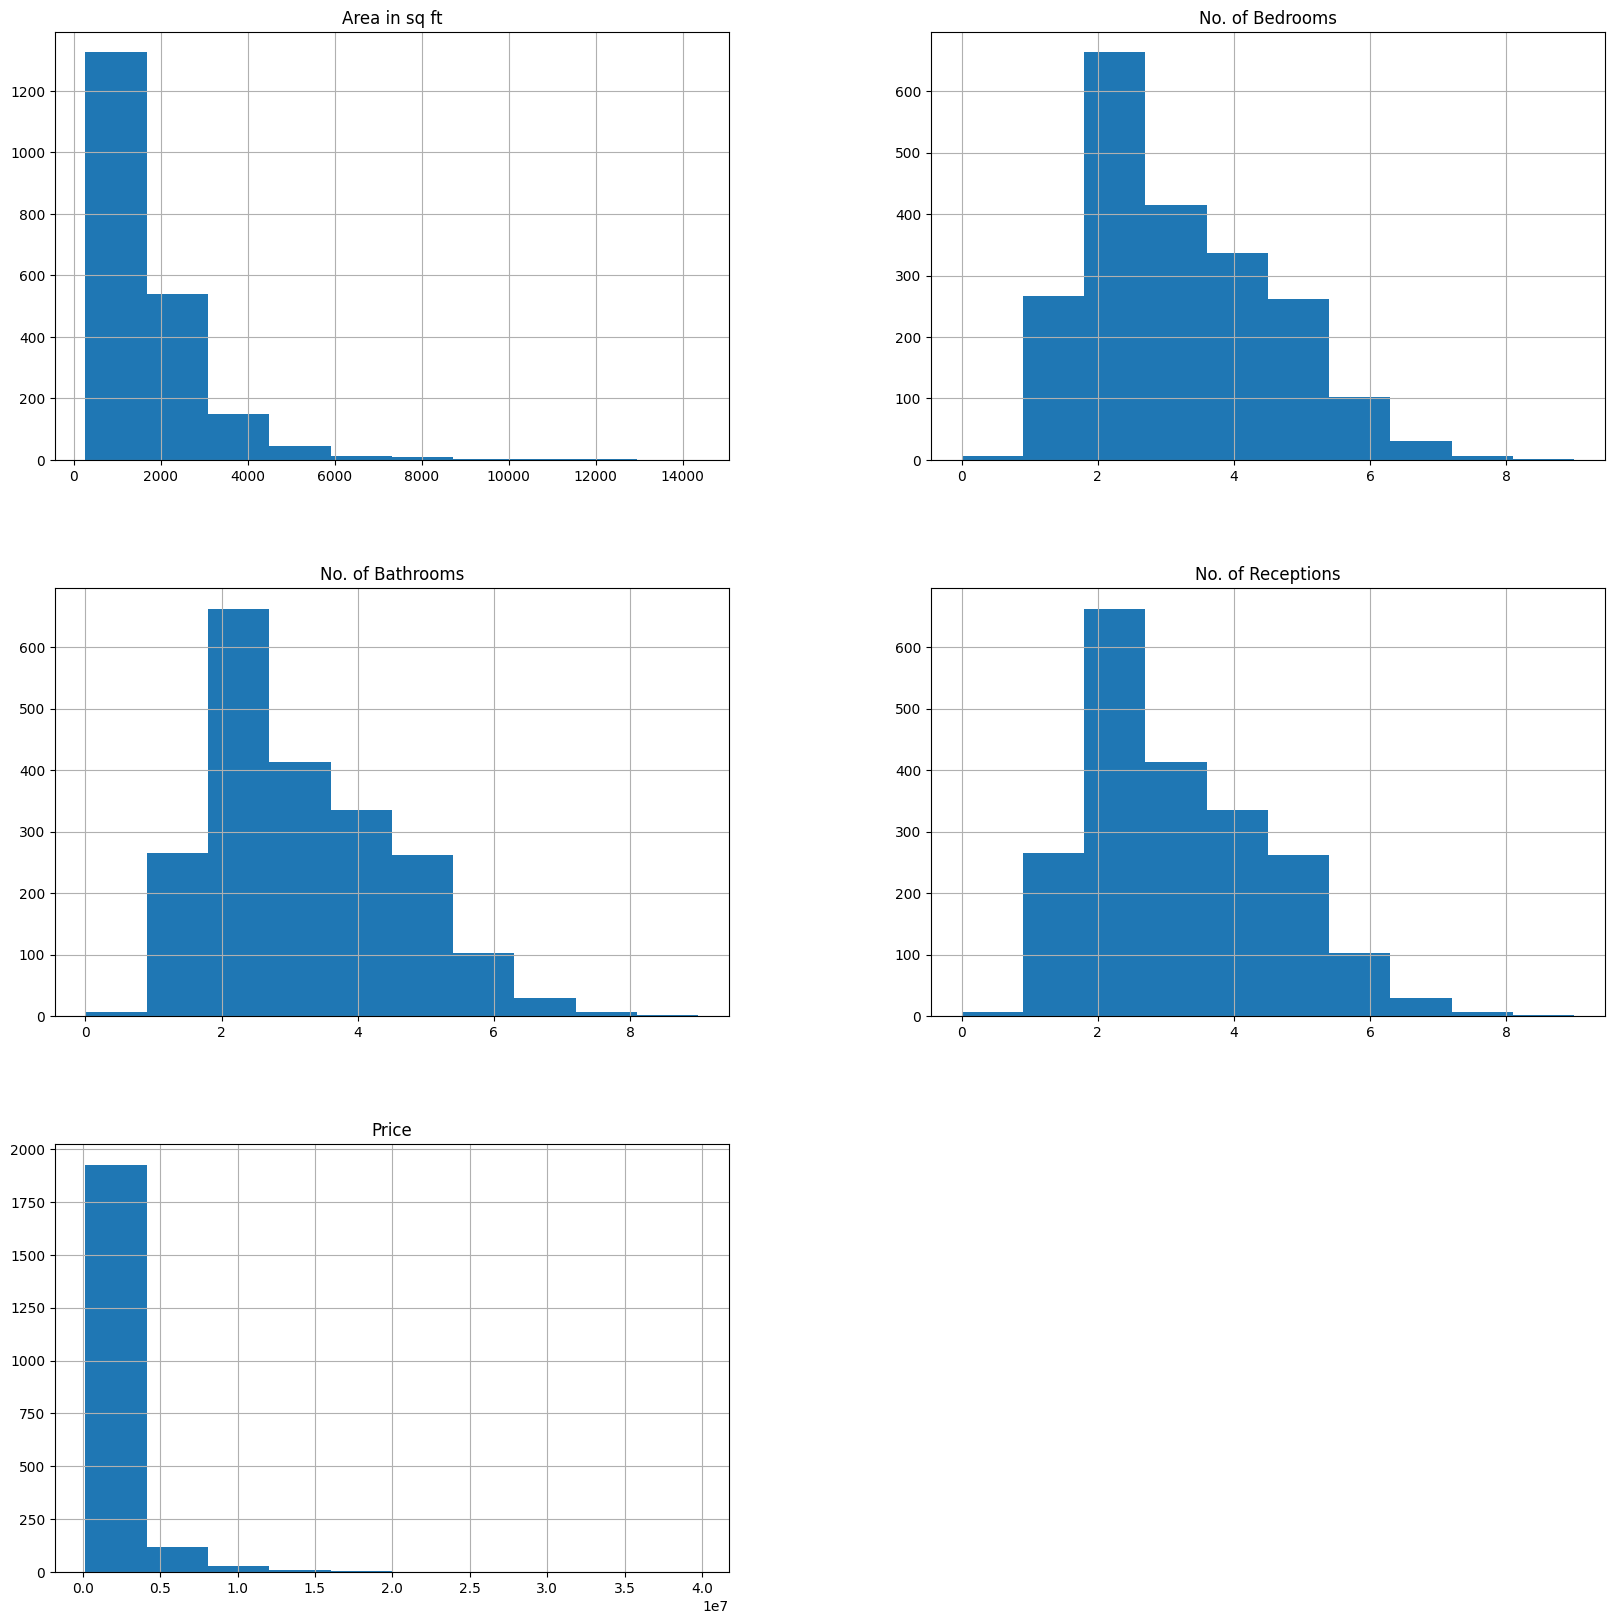

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

training_data = x_train.join(y_train)

training_data.hist(figsize=(20, 20))


<Axes: >

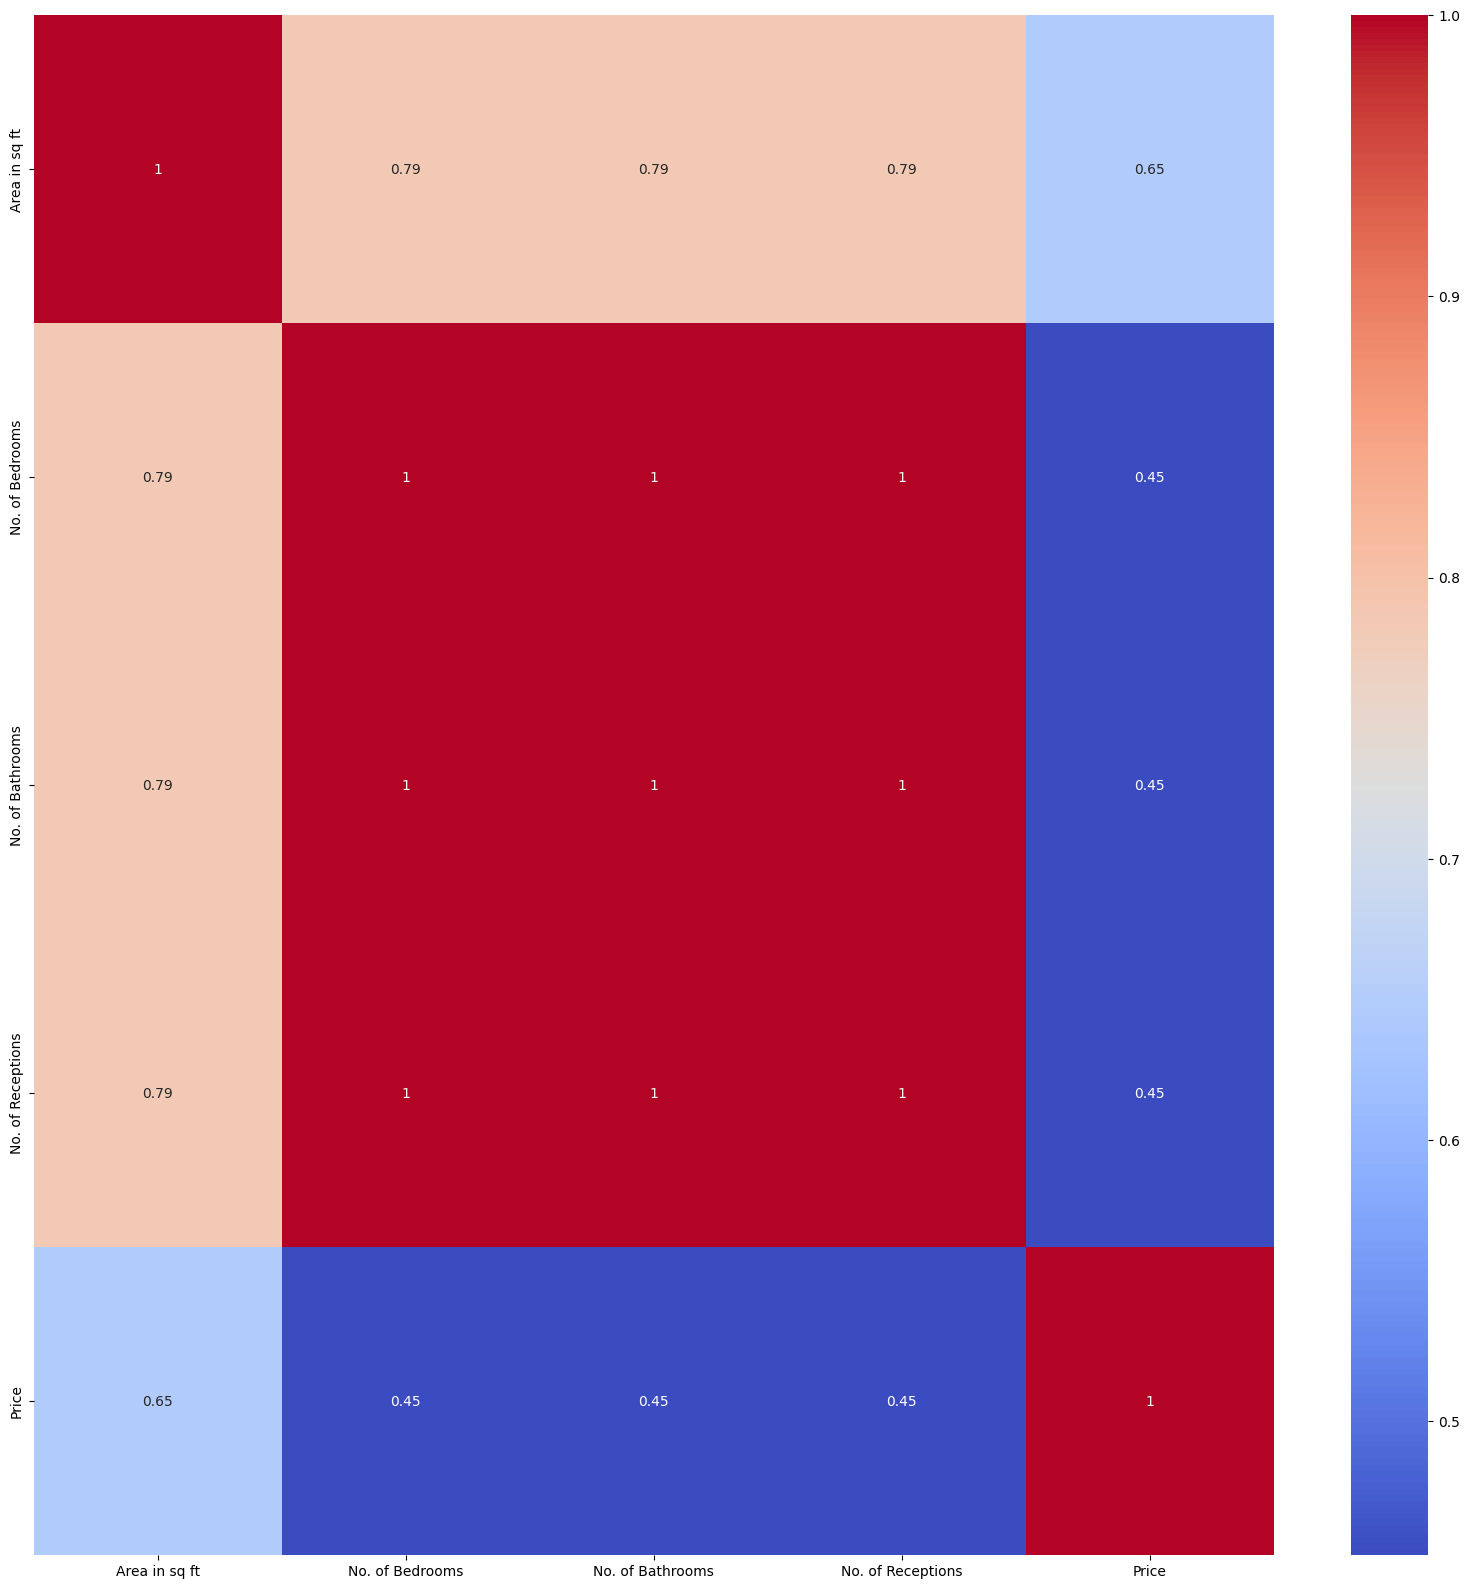

In [160]:
plt.figure(figsize=(20, 20))
sns.heatmap(training_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [161]:
training_data = training_data.join(pd.get_dummies(training_data['House Type'])).drop(['House Type'], axis=1)
# training_data = training_data.join(pd.get_dummies(training_data['Location'])).drop(['Location'], axis=1)
# training_data = training_data.drop(['Location'], axis=1)
# training_data = training_data.join(pd.get_dummies(training_data['City/County'])).drop(['City/County'], axis=1)
training_data['London'] = training_data['City/County'].apply(lambda x: x == 'London').astype('bool')
training_data = training_data.drop(['Location'], axis=1)
training_data = training_data.drop(['Property Name'], axis=1)
training_data = training_data.drop(['City/County'], axis=1)
training_data = training_data.drop(['Postal Code'], axis=1)


# # Drop the original 'City/County' column
# training_data = training_data.drop(['City/County'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 2088 entries, 2082 to 1842
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Area in sq ft      2088 non-null   int64
 1   No. of Bedrooms    2088 non-null   int64
 2   No. of Bathrooms   2088 non-null   int64
 3   No. of Receptions  2088 non-null   int64
 4   Price              2088 non-null   int64
 5   Bungalow           2088 non-null   bool 
 6   Duplex             2088 non-null   bool 
 7   Flat / Apartment   2088 non-null   bool 
 8   House              2088 non-null   bool 
 9   Mews               2088 non-null   bool 
 10  New development    2088 non-null   bool 
 11  Penthouse          2088 non-null   bool 
 12  Studio             2088 non-null   bool 
 13  London             2088 non-null   bool 
dtypes: bool(9), int64(5)
memory usage: 180.8 KB


<Axes: >

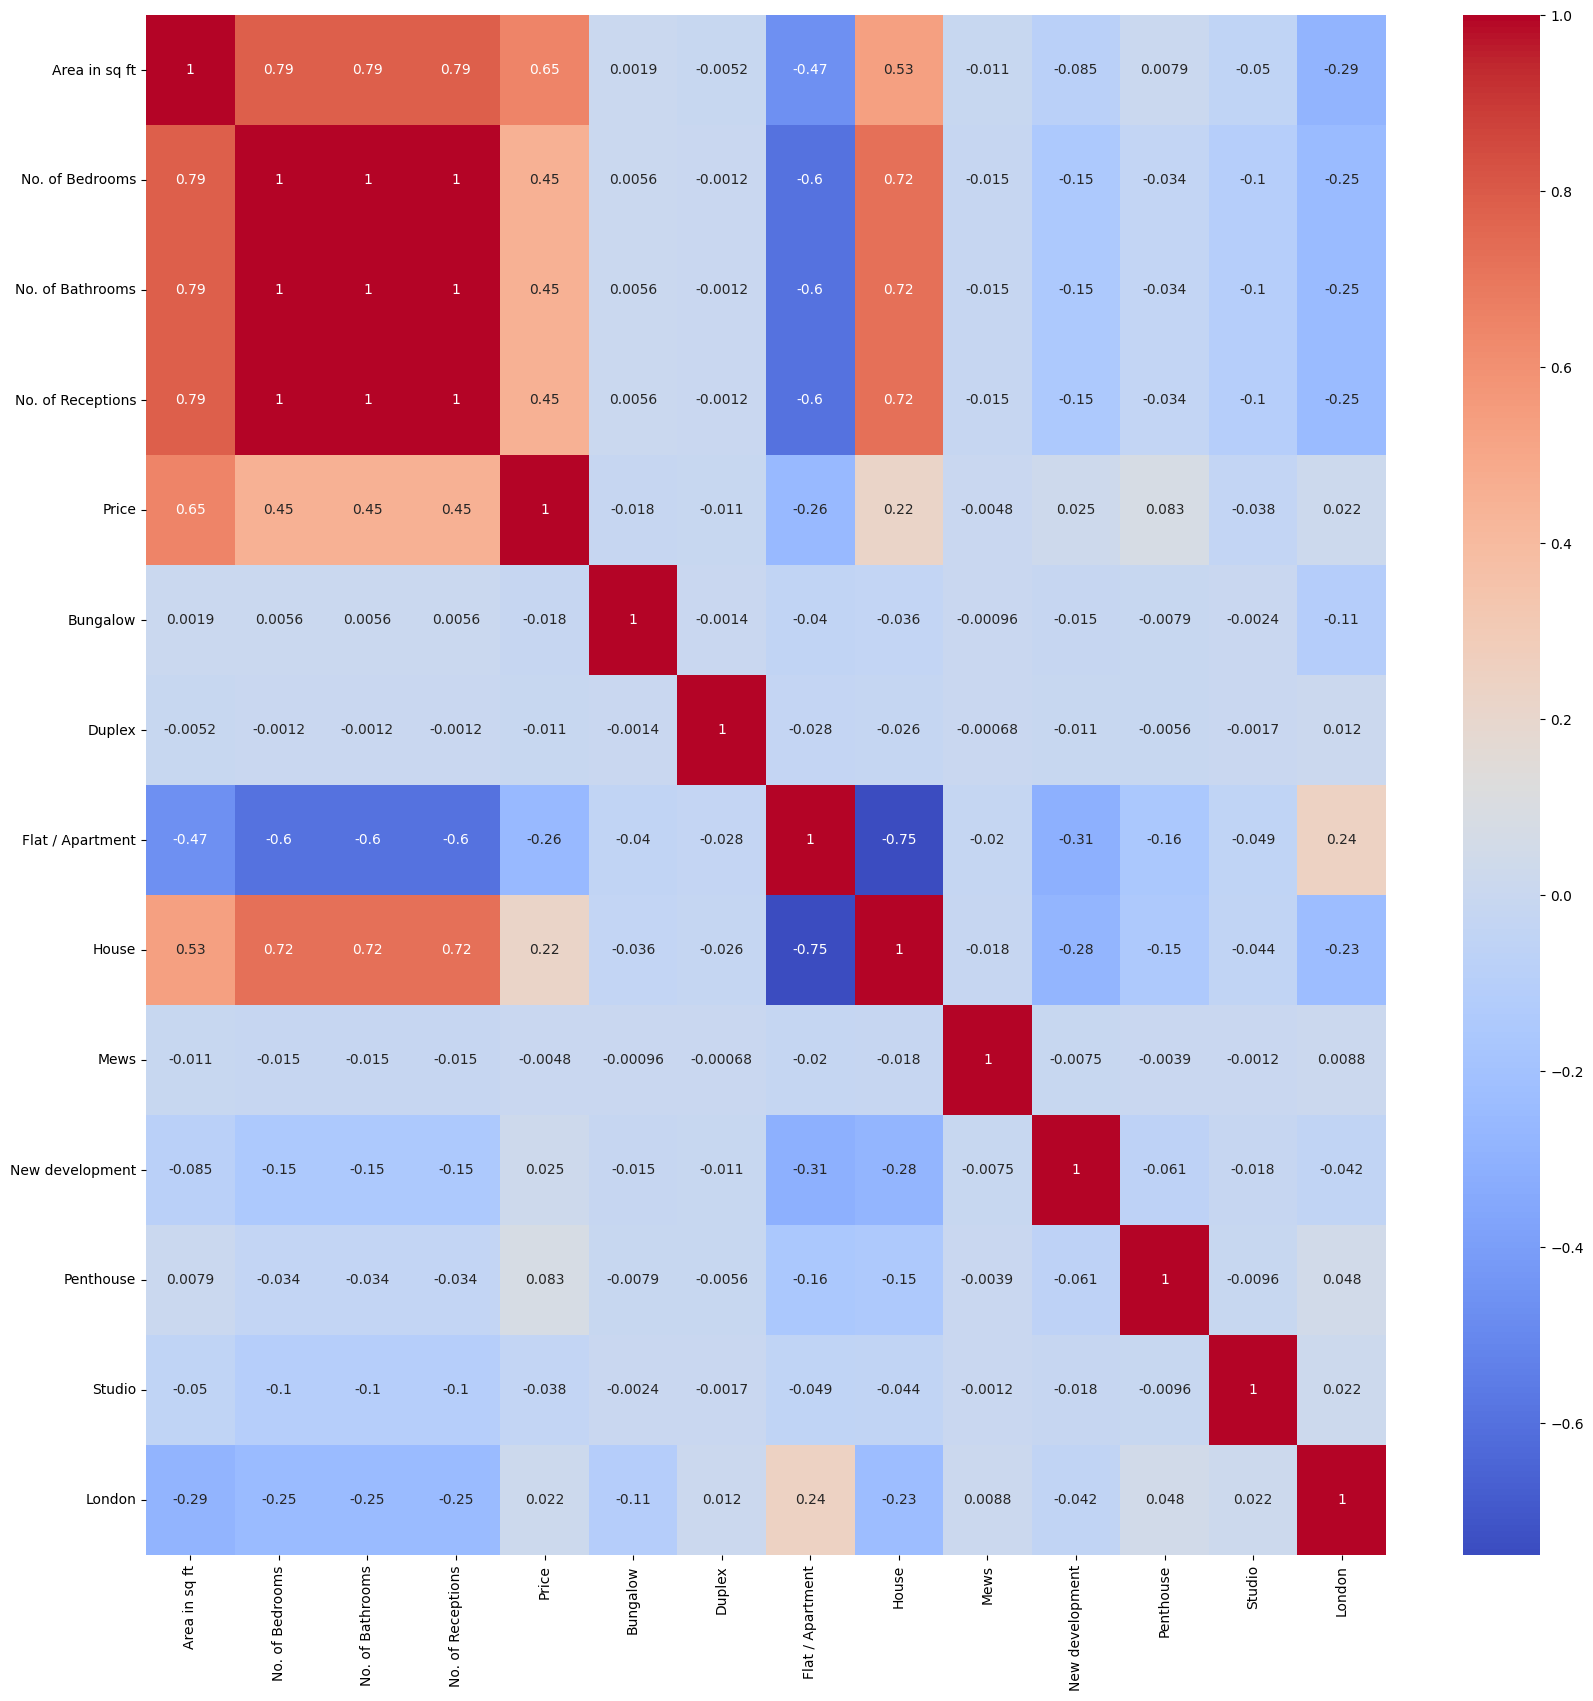

In [162]:
training_data.info()
plt.figure(figsize=(20, 20))

sns.heatmap(training_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [163]:
from sklearn.linear_model import LinearRegression

x_train, y_train = training_data.drop(['Price'], axis=1), training_data['Price']


reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [164]:

testing_data = x_test.join(y_test)


testing_data = testing_data.join(pd.get_dummies(testing_data['House Type'])).drop(['House Type'], axis=1)
# training_data = training_data.join(pd.get_dummies(training_data['Location'])).drop(['Location'], axis=1)
# training_data = training_data.drop(['Location'], axis=1)
# training_data = training_data.join(pd.get_dummies(training_data['City/County'])).drop(['City/County'], axis=1)
testing_data['London'] = testing_data['City/County'].apply(lambda x: x == 'London').astype('bool')
testing_data = testing_data.drop(['Location'], axis=1)
testing_data = testing_data.drop(['Property Name'], axis=1)
testing_data = testing_data.drop(['City/County'], axis=1)
testing_data = testing_data.drop(['Postal Code'], axis=1)

testing_data.head()

,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Price,Bungalow,Duplex,Flat / Apartment,House,Mews,New development,Penthouse,Studio,London
95,3714,5,5,5,4000000,False,False,False,True,False,False,False,False,True
2583,688,2,2,2,575000,False,False,True,False,False,False,False,False,True
3432,1702,3,3,3,2500000,False,False,False,True,False,False,False,False,True
2563,2230,5,5,5,1750000,False,False,False,True,False,False,False,False,True
751,1335,3,3,3,1418000,False,False,False,False,False,True,False,False,True


In [165]:
x_test, y_test = testing_data.drop(['Price'], axis=1), testing_data['Price']
reg.score(x_test, y_test)

0.5500290447528446

In [166]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.6569214922757044